In [1]:
#initialization
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#important constants (note all calculations on in SI units)
g = 9.8 #m.s^2

# Analytical Mechanics final

### Original equations

$\rho \dot{\theta}^2 + g \cos \theta = 2\kappa\ddot{\rho}$

$\rho\ddot{\theta} = - g \sin \theta$



### Convert to system of ODES

$\underline{y} = [\rho, \dot{\rho}, \theta, \dot{theta}]$

$\dot{y_1} = y_2$

$\dot{y_2} = \frac{1}{2\kappa}(y_1 y_4^2 + g \cos y_3)$

$\dot{y_3} = y_4$

$\dot{y_4} = -\frac{g}{y_1} \sin y_3$

$\kappa_{cylinder} = 1$

$\kappa_{sphere} = \frac{5}{6}$

$\kappa_{hemisphere, small} = \frac{1}{2} + \frac{1}{3}(10)^2 = \frac{203}{6}$ (imagine a 5 cm yoyo with a 5mm spool connection)

$\kappa_{hemisphere, very small} \approx \frac{1}{3}(\frac{R}{\alpha})^2 \approx 333 $ (imagine a 10 cm yoyo with a 1mm spool connection with a lot of hand waving)

$y_0: (0,0,45^\circ, 0)$ and $t_0 = 0 s$

In [32]:
# discrete time step
dt = 0.01

# simulation time range
time = np.arange(0.01, 4.0 + dt, dt)

# second-order system initial conditions [y1, y2] @ t = 1
y0 = np.array([0.1, 0.1, np.radians(45), 0.1])


def ode_system(_t, _y, kappa):
    """
    system of first order differential equations
    _t: discrete time step value
    _y: state vector [y1, y2, y3, y4]
    kappa: constant relating to each yoyo geometry
    """
    return np.array([_y[1],
                     (_y[0]*_y[3]**2+g*np.cos(_y[2]))/(2*kappa),
                     _y[3],
                     -g/_y[0]*np.sin(_y[2])])

I am implementing Runge-Kutta 4:

$\underline{y}_{k+1} = y_k + \frac{\Delta t}{6}(f_1 +2f_2+2f_3+f_4)$
where the subscript refers to the iteration number and $f_1$ through $f_4$ used to estimate the local vector field at various stages on the interval ($t_{k}, t_{k+1}$)

In [4]:
def rk4(func, tk, _yk, _dt, kappa):
    """
    single-step fourth-order numerical integration (RK4) method
    func: system of first order ODEs
    tk: current time step
    _yk: current state vector [y1, y2, y3, ...]
    _dt: discrete time step size
    kappa: constant relating to each yoyo geometry
    returns: y evaluated at time k+1
    """

    # evaluate derivative at several stages within time interval
    f1 = func(tk, _yk, kappa)
    f2 = func(tk + _dt / 2, _yk + (f1 * (_dt / 2)), kappa)
    f3 = func(tk + _dt / 2, _yk + (f2 * (_dt / 2)), kappa)
    f4 = func(tk + _dt, _yk + (f3 * _dt), kappa)

    # return an average of the derivative over tk, tk + dt
    return _yk + (_dt / 6) * (f1 + (2 * f2) + (2 * f3) + f4)

In [33]:
# ==============================================================
# propagate state

# simulation results
history_cylinder = []
history_sphere = []
history_hemisphere_small = []
history_hemisphere_very_small = []

# initialize yk
yk_cylinder = y0
yk_sphere = y0
yk_hemisphere_small = y0
yk_hemisphere_very_small = y0

# intialize time
t = 0

#yoyo geometry
kappa_cylinder = 1
kappa_sphere = 5/6
kappa_hemisphere_small = 203/6       #
kappa_hemisphere_very_small = 333   #

# approximate y at time t
for t in time:
    history_cylinder.append(yk_cylinder)
    history_sphere.append(yk_sphere)
    history_hemisphere_small.append(yk_hemisphere_small)
    history_hemisphere_very_small.append(yk_hemisphere_very_small)
    yk_cylinder = rk4(ode_system, t, yk_cylinder, dt, kappa_cylinder)
    yk_sphere = rk4(ode_system, t, yk_sphere, dt, kappa_sphere)
    yk_hemisphere_small = rk4(ode_system, t, yk_hemisphere_small, dt, kappa_hemisphere_small)
    yk_hemisphere_very_small = rk4(ode_system, t, yk_hemisphere_very_small, dt, kappa_hemisphere_very_small)

# convert list to numpy array
history_cylinder = np.array(history_cylinder)
history_sphere = np.array(history_sphere)
history_hemisphere_small = np.array(history_hemisphere_small)
history_hemisphere_very_small = np.array(history_hemisphere_very_small)

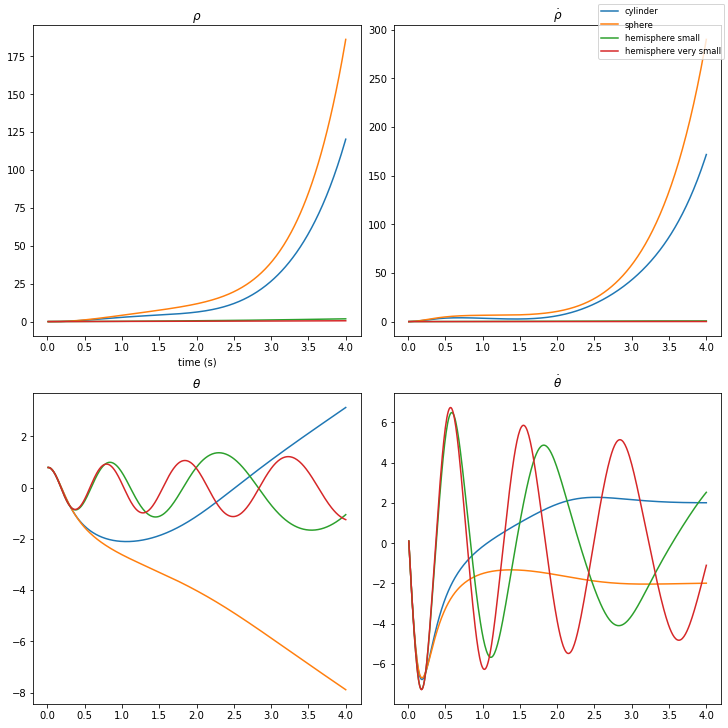

In [34]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)

ax1.plot(time, history_cylinder[:,0], time, history_sphere[:,0], time, history_hemisphere_small[:,0], time, history_hemisphere_very_small[:,0])
ax2.plot(time, history_cylinder[:,1], time, history_sphere[:,1], time, history_hemisphere_small[:,1], time, history_hemisphere_very_small[:,1])
ax3.plot(time, history_cylinder[:,2], time, history_sphere[:,2], time, history_hemisphere_small[:,2], time, history_hemisphere_very_small[:,2])
ax4.plot(time, history_cylinder[:,3], time, history_sphere[:,3], time, history_hemisphere_small[:,3], time, history_hemisphere_very_small[:,3])
ax1.set_title(r'$\rho$')
ax2.set_title(r"$\dot{\rho}$")
ax3.set_title(r"$\theta$")
ax4.set_title(r"$\dot{\theta}$")
fig.legend(['cylinder','sphere','hemisphere small', 'hemisphere very small'],prop= {'size':'small'})
ax1.set_xlabel('time (s)')
plt.show()